Training data shape: (80000, 28)
Test data shape: (20000, 27)

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  

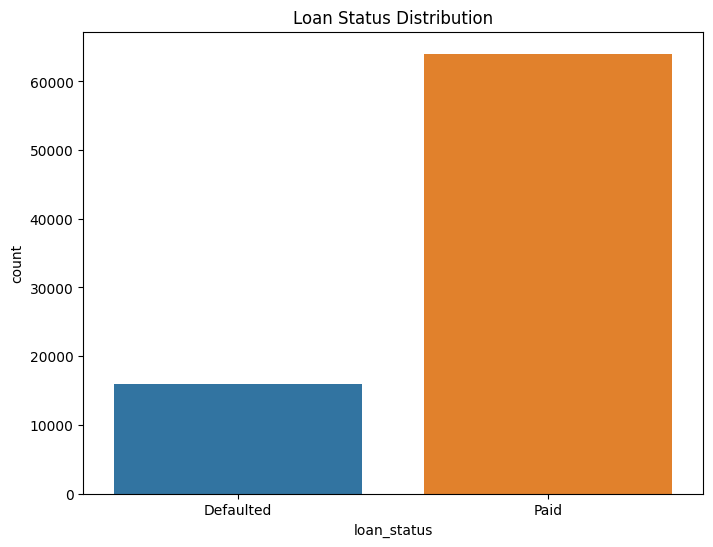


Training Logistic Regression model...


/home/vineetgoyal/perosnal_workspace/samyak_assignment/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1-score: 0.7472

Training Decision Tree model...
Decision Tree F1-score: 0.7330

Training Random Forest model...
Random Forest F1-score: 0.7251

Training Gradient Boosting model...
Gradient Boosting F1-score: 0.7303

Best model: LogisticRegression
Best F1-score: 0.7472


/home/vineetgoyal/perosnal_workspace/samyak_assignment/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best hyperparameters:
{'model__C': 1, 'model__penalty': 'l2'}

Predictions saved to 'test_predictions.csv'


/home/vineetgoyal/perosnal_workspace/samyak_assignment/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vineetgoyal/perosnal_workspace/samyak_assignment/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [1]:
# Import necessary libraries
# pandas: Data manipulation and analysis library
# numpy: Numerical computing library
# matplotlib: Data visualization library
# seaborn: Statistical data visualization library
# sklearn: Machine learning library for preprocessing, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report

# Load the dataset
# Read the training and test data from CSV files using pandas
train_data = pd.read_csv('train_loan_data.csv')
test_data = pd.read_csv('test_loan_data.csv')

# Exploratory Data Analysis (EDA)
# Explore and understand the structure and characteristics of the data
# Print dataset information such as shape, data types, and summary statistics
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("\nTraining data info:")
train_data.info()
print("\nTest data info:")
test_data.info()

print("\nTraining data description:")
train_data.describe()

# Visualize the target variable distribution
# Create a count plot to visualize the distribution of loan status in the training data
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_data)
plt.title('Loan Status Distribution')
plt.show()

# Preprocess the data
# Prepare the data for modeling by handling missing values, encoding categorical variables, and scaling numeric features
# Split the dataset into numeric and non-numeric features
numeric_features = train_data.select_dtypes(include=[np.number]).columns
non_numeric_features = train_data.select_dtypes(exclude=[np.number]).columns

# Remove 'loan_status' from non-numeric features for both training and test data
non_numeric_features_train = non_numeric_features.drop('loan_status')
non_numeric_features_test = non_numeric_features.drop('loan_status')

# Impute missing values separately for numeric and non-numeric features
# Use median imputation for numeric features and most frequent value imputation for non-numeric features
imputer_numeric = SimpleImputer(strategy='median')
imputer_non_numeric = SimpleImputer(strategy='most_frequent')

train_data[numeric_features] = imputer_numeric.fit_transform(train_data[numeric_features])
train_data[non_numeric_features_train] = imputer_non_numeric.fit_transform(train_data[non_numeric_features_train])

test_data[numeric_features] = imputer_numeric.transform(test_data[numeric_features])
test_data[non_numeric_features_test] = imputer_non_numeric.transform(test_data[non_numeric_features_test])

# Prepare the data for modeling
# Split the training data into features (X) and target variable (y)
X_train = train_data.drop('loan_status', axis=1)
y_train = train_data['loan_status']
X_test = test_data

# Create preprocessing pipelines
# Define separate preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric features using StandardScaler
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features using OneHotEncoder
])

# Combine the numeric and categorical preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, non_numeric_features_train)
    ])

# Define the models
# Create a dictionary of models to train and evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
# Iterate over the models, train them, and evaluate their performance using F1-score
best_model = None
best_score = 0

for name, model in models.items():
    print(f"\nTraining {name} model...")

    # Create a pipeline that includes preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Split the data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the model on the training set
    pipeline.fit(X_train_split, y_train_split)

    # Make predictions on the validation set
    y_pred = pipeline.predict(X_val)

    # Evaluate the model using F1-score
    score = f1_score(y_val, y_pred, average='weighted')
    print(f"{name} F1-score: {score:.4f}")

    # Update the best model if the current model has a higher F1-score
    if score > best_score:
        best_score = score
        best_model = pipeline

# Print the best model and its F1-score
print(f"\nBest model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best F1-score: {best_score:.4f}")

# Hyperparameter tuning for the best model
# Define hyperparameter grids for different models
if isinstance(best_model.named_steps['model'], RandomForestClassifier):
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    }
elif isinstance(best_model.named_steps['model'], GradientBoostingClassifier):
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.5],
        'model__max_depth': [3, 5, 7]
    }
elif isinstance(best_model.named_steps['model'], LogisticRegression):
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__penalty': ['l2']
    }
else:
    param_grid = {}

if param_grid:
    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("\nBest hyperparameters:")
    print(grid_search.best_params_)

    # Use the best model with tuned hyperparameters
    best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_test_pred = best_model.predict(X_test)

# Save predictions to a CSV file
output = pd.DataFrame({'loan_status': y_test_pred})
output.to_csv('test_predictions.csv', index=False)

print("\nPredictions saved to 'test_predictions.csv'")